<a href="https://colab.research.google.com/github/dmejiaho/Parciales/blob/main/Parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parcial 2
##Juan Jerónimo Castaño Rivera
##Wilmer Sebastian Perez Cuastumal
##Daniel Mauricio Mejia Hoyos

1. Encuentre la expresion del espectro de Fourier (forma exponencial y trigonométrica) para la señal $x(t)=|Asin(2πF_o t)|^2$
con $t ∈ [−\frac{1}{2F_o},\frac{1}{2F_o}]$ y A, Fo ∈ $R+$.

2. Realice las simulaciones respectivas para graficar el espectro de Fourier del ejercicio 1 (magnitud y fase como diagrama de Bode en decibelios), y presente el error relativo y la senal reconstruida para  $N = [1, 2, . . . , 50]$


El ejercicio se desarrolla a partir de numpy (discreto)

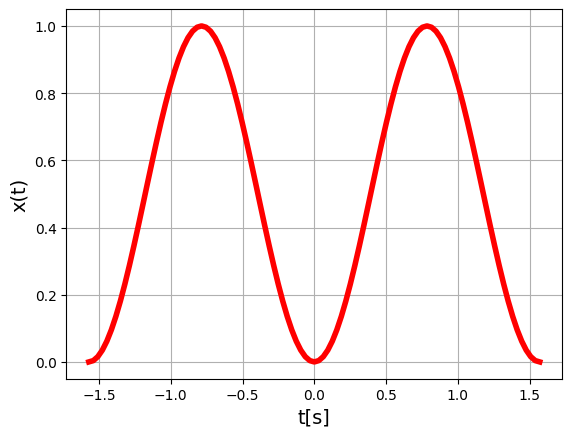

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#mostrar la señal
To = np.pi # periodo definido
Fo = 1/To
Fs = 100*Fo # frecuencia de muestreo definida
tv = np.arange(-To/2,To/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas
A=1 #Constante definida
x = (A*np.sin(2*np.pi*Fo*tv))**2

#graficar señal original
plt.plot(tv,x,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()

Se definen las bases para hacer la aproximación con Fourier

In [ ]:
N = 50 #numero armonicos
wo = 2*np.pi/To # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [ ]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = 0*nv
Cn[N] = (A**2)/2 #Nivel DC
Cn[N+2] = -(A**2)/4
Cn[N-2] = -(A**2)/4

Se grafica el espectro

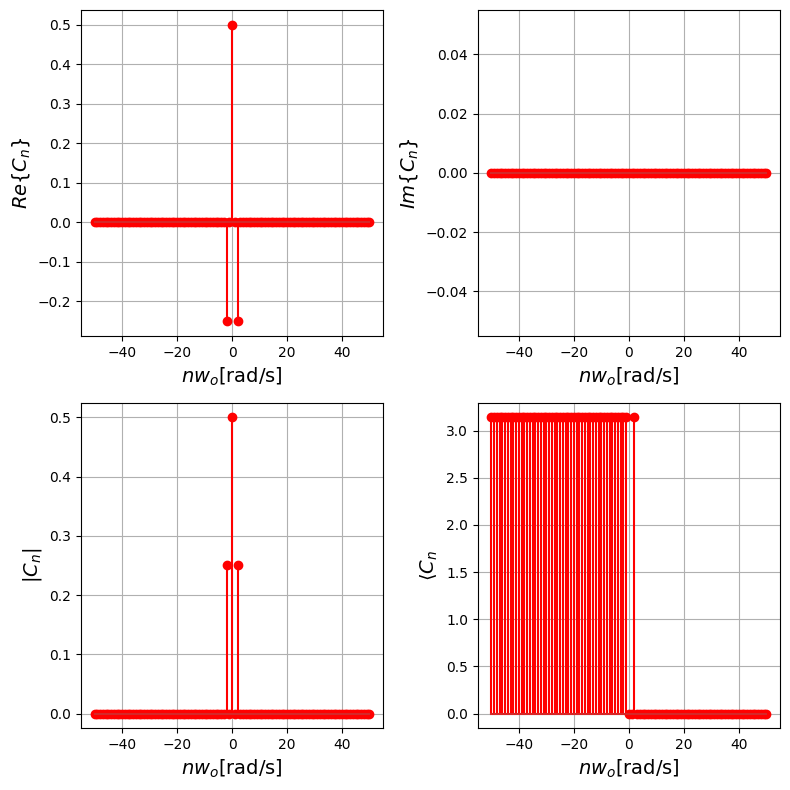

In [ ]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

Espectro en diagrama de bode

<ipython-input-72-54a4d902ac5e>:5: RuntimeWarning: divide by zero encountered in log10
  plt.stem(nv, 20 * np.log10(abs(Cn)), 'r')


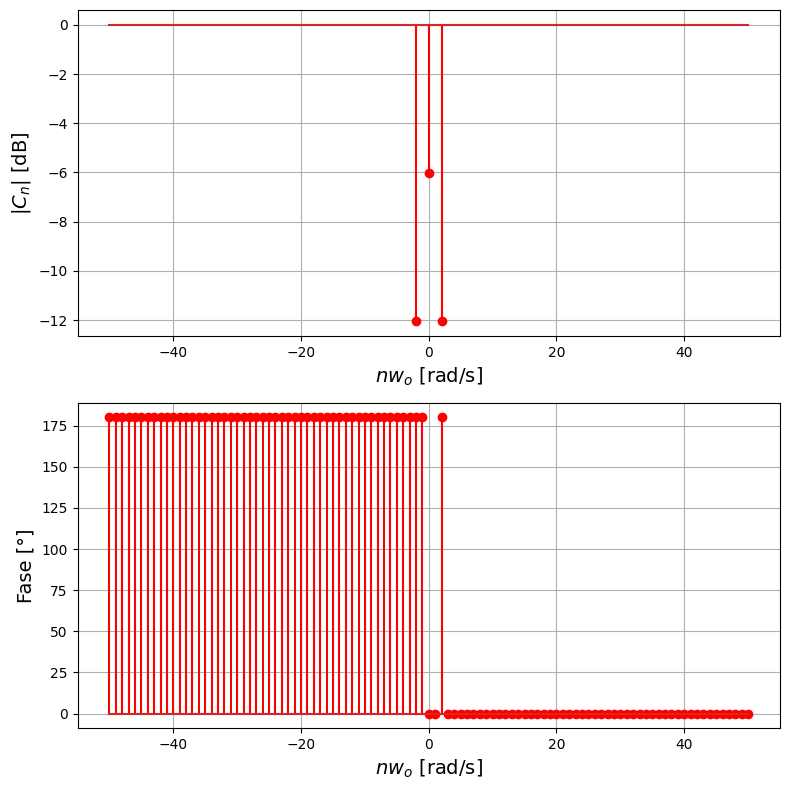

In [ ]:
plt.figure(figsize=(8, 8))


plt.subplot(2, 1, 1)
plt.stem(nv, 20 * np.log10(abs(Cn)), 'r')
plt.xlabel(r'$nw_o$ [rad/s]', fontsize=14)
plt.ylabel(r'$|C_n|$ [dB]', fontsize=14)
plt.grid()
plt.axis('tight')

plt.subplot(2, 1, 2)
plt.stem(nv, np.angle(Cn, deg=True), 'r')
plt.xlabel(r'$nw_o$ [rad/s]', fontsize=14)
plt.ylabel(r'Fase [°]', fontsize=14)
plt.grid()
plt.axis('tight')


plt.tight_layout()

Se reconstruye la señal a partir de los pesos calculas y se calcula el error con respecto a la señal original

In [ ]:
from ipywidgets import interact,IntSlider
Px = 3/8 # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',marker='o', markersize=5, label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=50, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

3. Sea la senal portadora $c(t) = A_c sin(2πF_ct)$, con $A_c, F_c ∈ R$, y la senal mensaje $m(t) ∈ R$. Encuentre el espectro en
frecuencia de la senal modulada en amplitud (AM), $y(t)= (1 + \frac{m(t)}{A_c})
c(t)$. Luego, descargue desde youtube 5 segundos de
su cancion favorita (capturando del segundo 20 al 25). Presente una simulación de modulación por amplitud AM (tomando como mensaje el fragmento de la cancion escogida). Grafique las señales en tiempo y frecuencia (magnitud y fase) de la senal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y señal modulada.

  Nota: se sugiere utilizar un canal de senal de audio para el desarrollo del ejercicio. El usuario debe poder escoger el índice de
modulacion deseado.

Modulación AM
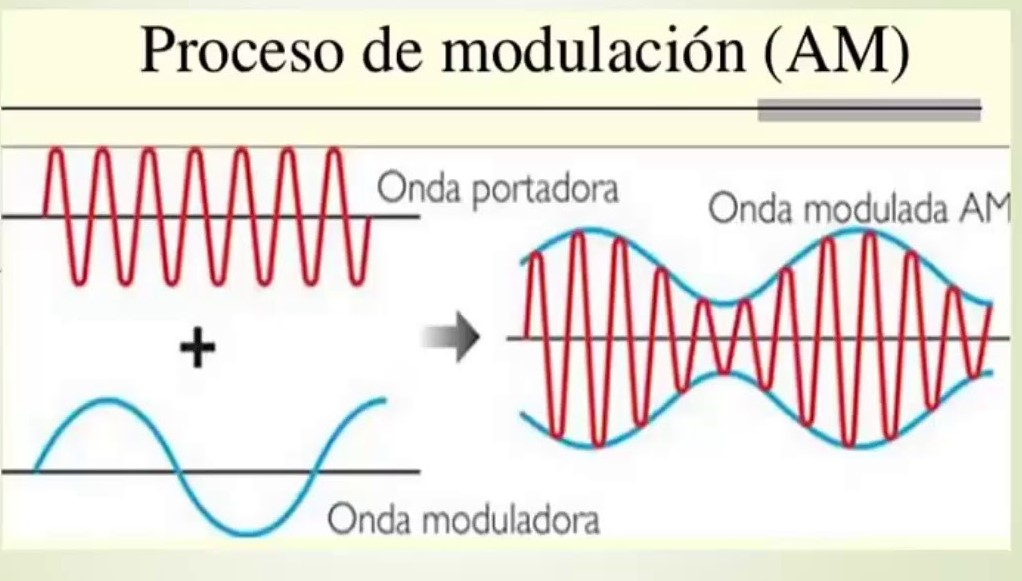


El proceso de modulación, usado principalmente en telecomunicaciones, es un proceso usado en la transmisión de señales por un medio (ya sea físico o no).

Se tiene en este caso la señal que se quiere transmitir (señal mensaje). Estas señales son principalmente de baja frecuencia, por lo que para transmitirlas de un lado a otro, se requieren de equipos muy especializados y en tanto, costosos, por lo que se aplica esta técnica.

La señal mensaje se mezcla con una señal portadora (puede ser una señal senoidal), de muy alta frecuencia, que la va a transportar por el medio.

Al mezclarlas, la señal mensaje modula a partir de su amplitud a la señal de alta frecuencia, haciendo que el mensaje original quede inscrito allí y se pueda transmitir fácilmente debido a que sigue conservando la alta frecuencia de la señal portadora

- Se requiere entonces de una portadora (carrier) senoidal/cosenoidal:

$$c(t)=A_c\sin(2\pi F_c t)$$

- Para ilustrar el proceso, se trabaja con un mensaje tipo sen/cos:

$$m(t) = A_m \cos(2\pi F_m t)$$

- La modulación AM puede calibrarse en términos del índice de modulación:

$$I_m = \frac{Peak\{|m(t)|\}}{A_c}$$

 donde $Peak\{|m(t)|\}$ es el valor pico (máximo) de $|m(t)|$.


- La señal a transmitir, señal modulada, en AM se cálcula como:

$$y(t)= \left(1+\frac{m(t)}{A_c}\right)c(t)$$

##Diagrama
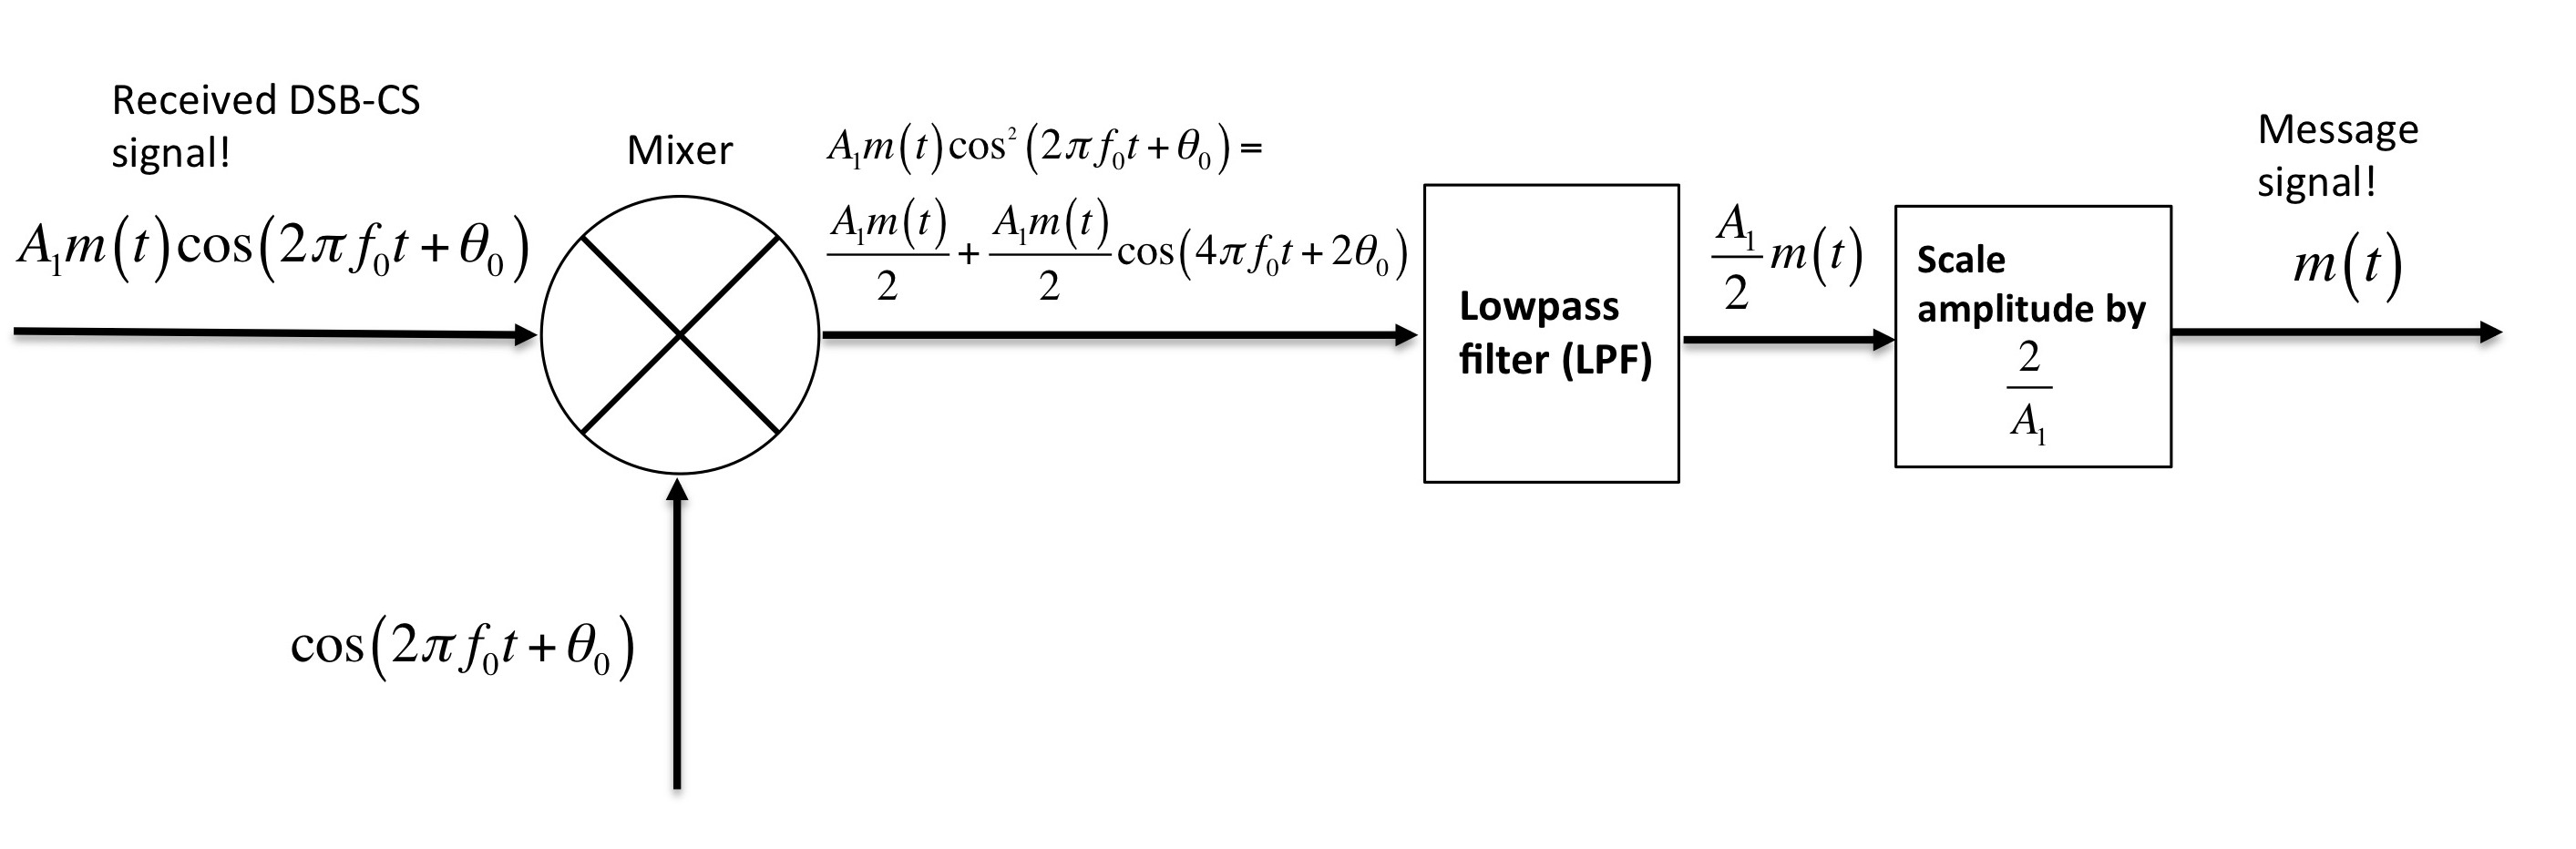

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Frecuencia portadora y muestreo

Fc = 100 #frecuencia de portadora

Fm = 10 #frecuencia del mensaje
Am = 1 #amplitud del mensaje


ti = 0
tf = 5/Fm #cantidad de periodos a graficar de la

Fs = 5*Fc #frecuencia muestreo

t = np.arange(ti,tf,1/Fs) #vector del tiempo
m = Am*np.cos(2*np.pi*Fm*t) #mensaje

Im = 0.8 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im

Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*t) #portadora
print(Ac)

1.25


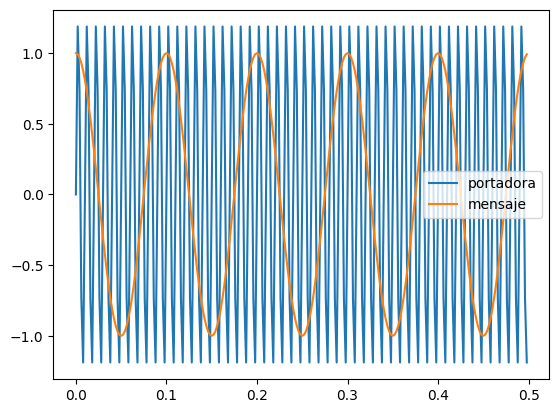

In [ ]:
plt.plot(t,c,label='portadora')
plt.plot(t,m,label='mensaje')
plt.legend()
plt.show()

Se modula la señal a partir de la señal mensaje y señal portadora

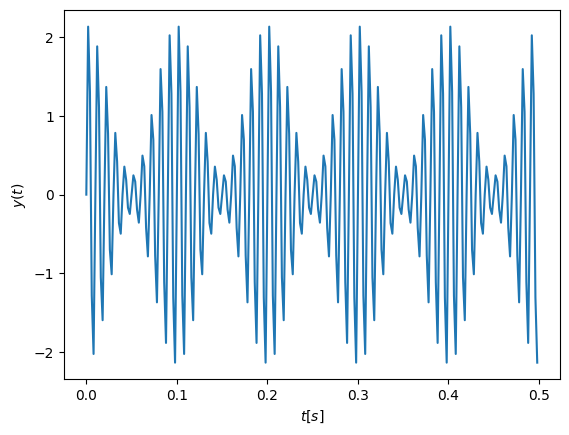

In [ ]:
y = (1+m/Ac)*c #señal modulada en AM
plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

Lugo, a partir de la fft se calcula el espectro de la señal portadora, mensaje y modulada

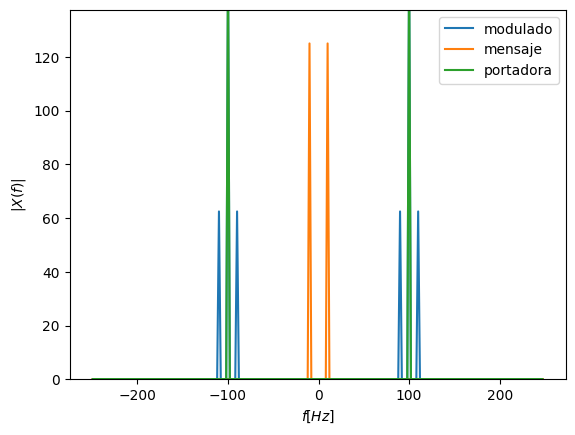

In [ ]:
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

In [ ]:
#Se instala api para descargar videos desde youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

     - 2.7 MB 8.4 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached certifi-2024.7.4-py3-none-any.whl.metadata (2.2 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Using cached idna-3.8-py3-none-any.whl.metadata (9.9 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.7.4-py3-none-any.whl (162 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.1 MB/s eta 0:00:00
Using cached charset_

In [ ]:
link="https://www.youtube.com/watch?v=jRagJhQwy-Y"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}

[youtube] Extracting URL: https://www.youtube.com/watch?v=jRagJhQwy-Y
[youtube] jRagJhQwy-Y: Downloading webpage
[youtube] jRagJhQwy-Y: Downloading ios player API JSON
[youtube] jRagJhQwy-Y: Downloading web creator player API JSON
[youtube] jRagJhQwy-Y: Downloading player bcd1f224
[youtube] jRagJhQwy-Y: Downloading m3u8 information
[info] jRagJhQwy-Y: Downloading 1 format(s): 251
[download] Destination: audio
[download] 100% of    3.31MiB in 00:00:01 at 2.43MiB/s
[ExtractAudio] Destination: audio.mp3
Deleting original file audio (pass -k to keep)


In [ ]:
!ffmpeg -y -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!pip install soundfile

In [ ]:
import soundfile as sf # para instalar pip install soundfile
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [ ]:
x.shape

(10401920, 2)

Se observa que la canción x tiene dos columnas (canal de audio derecho e izquierdo). Por simplicidad se va a trabajar solamente con el primer canal

In [ ]:
from IPython.display import Audio
Audio(x[int(fs*20):int(fs*25),:].T,rate=fs)

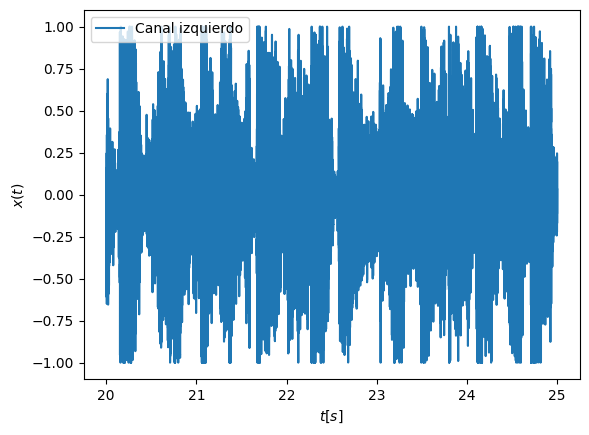

In [ ]:
xpro = x.copy() #copiar archivos para procesar
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
xs = xpro[int(ti*fs):int((tf*fs)),0]

tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,xs,label="Canal izquierdo")
plt.xlabel('$t[s]$')
plt.ylabel('$x(t)$')
plt.legend()
plt.show()

El usuario debe poder escoger el indice de modulación

In [ ]:
len(xs)

240000

In [ ]:
Im=float(input("Ingrese el indice de modulacion que desea:  "))

Ingrese el indice de modulacion que desea:  0.8


Si el pedazo de la cancion es la señal de mensaje y la señal portadora es:
$$c(t)=A_c\sin(2\pi F_c t)$$

In [ ]:
#Frecuencia portadora y muestreo

Fc = 1000 #frecuencia de portadora

ti = 20
tf = 25 #cantidad de periodos a graficar de la

Fs = 48000 #frecuencia muestreo

t = np.arange(ti,tf,1/Fs) #vector del tiempo


Ac = max(abs(xs))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*t) #portadora
print(Ac)

1.25


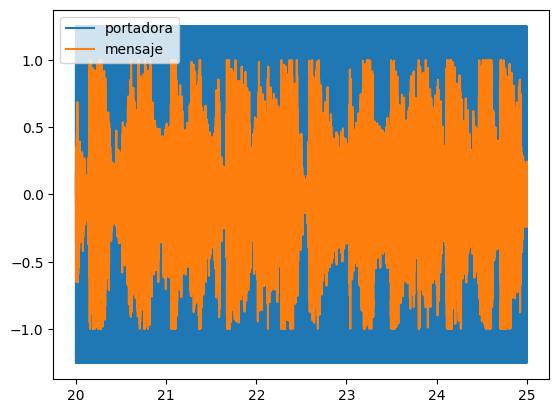

In [ ]:
plt.plot(t,c,label='portadora')
plt.plot(t,xs,label='mensaje')
plt.legend()
plt.show()

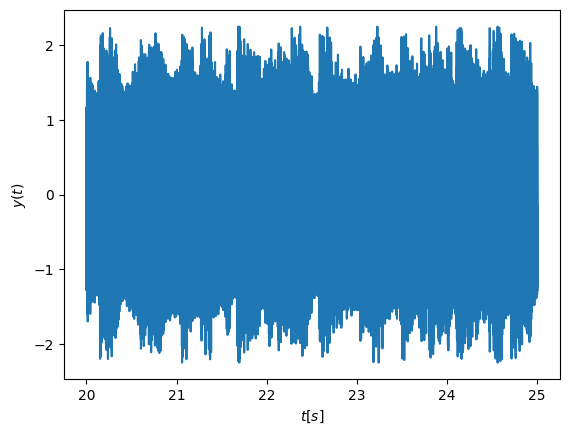

In [ ]:
y = (1+xs/Ac)*c #señal modulada en AM

plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

- A continuación, se presenta el espectro de la señal mensaje (cancion), portadora y modulada.

Debido a que no hay componente imaginaria, se puede usar la transformada real rápida de fourier. Para valores de frecuencia negativo el gráfico se refleja (simetría par)

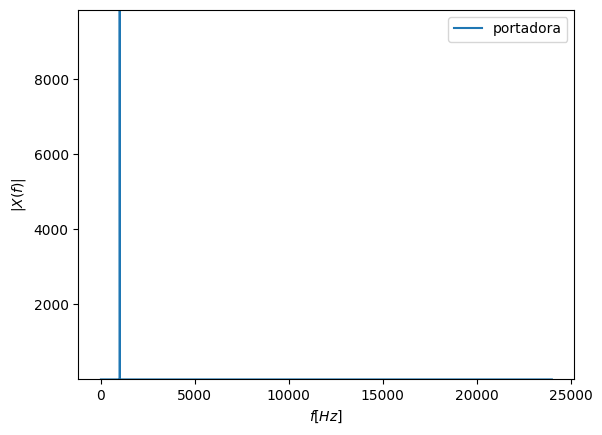

In [ ]:
Xfc = np.fft.rfft(c)
Xfm = np.fft.rfft(xs)
Xfy = np.fft.rfft(y)

vfre = np.fft.rfftfreq(len(c),1/Fs)

#plt.plot(vfre,abs(Xfy),label='modulado')
#plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

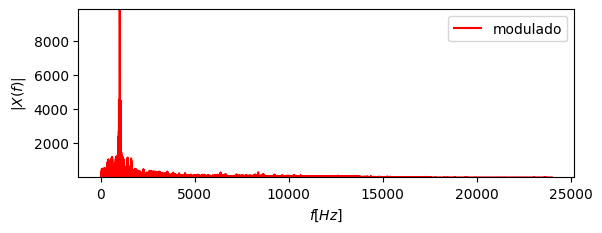

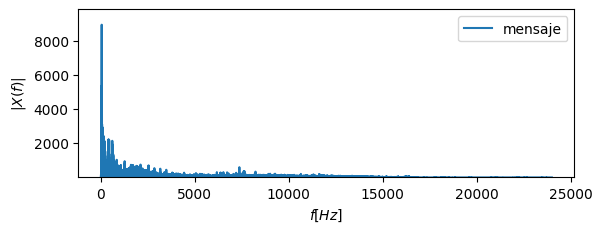

In [ ]:
plt.subplot(2,1,1)
plt.plot(vfre,abs(Xfy),label='modulado',c="r")
#plt.plot(vfre,abs(Xfm),label='mensaje')
#plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

plt.subplot(2,1,2)
#plt.plot(vfre,abs(Xfy),label='modulado',c="r")
plt.plot(vfre,abs(Xfm),label='mensaje')
#plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

Ahora se pueden rerpoducir los audios

Audio de la portadora

In [ ]:
Audio(c,rate=fs)

Audio del mensaje (estracto original)

In [ ]:
Audio(xs,rate=fs)

Audio de la señal modulada

In [ ]:
Audio(y,rate=fs)

Esta señal luego se pasa por un demodulador, con el fin de filtrar las frecuencias altas y modificar la amplitud, para obtener de nuevo la señal mensaje original

Distorción de Armónicos (THD)
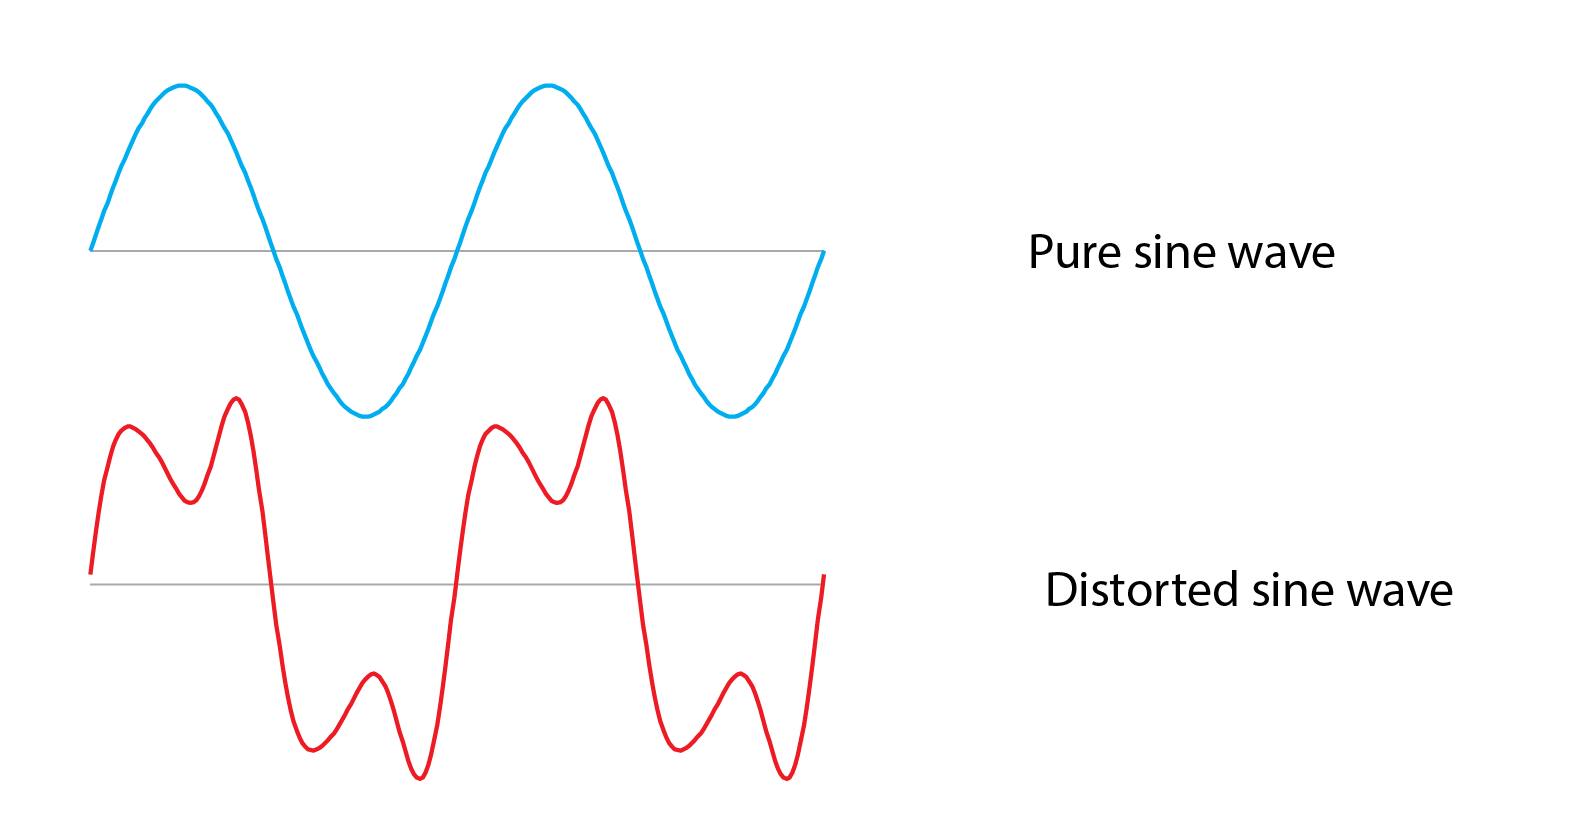

La forma de onda ideal de la fuente de alimentación de CA es una onda sinusoidal pura de 50 Hz o 60 Hz sin ningún ruido. Pero desafortunadamente, en realidad, es difícil tener una fuente de alimentación de CA ideal. Esto se debe a que, a veces, la carga que usamos causa distorsión en la forma de onda de la fuente de alimentación de CA.

El THD mide la cantidad de distorsión armónica presente en una señal en comparación con su frecuencia fundamental. En circuitos eléctricos, se usa para evaluar la calidad de las señales de voltaje o corriente, especialmente en sistemas de potencia y electrónica de potencia

## Cálculo de la distorsión total de armónicos - THD

Con los valores de frecuencia en Hz y el espectro cálculado como arreglo de numpy, se puede calcular la distorsión total de armónicos (THD)
$$THD = \frac{\sqrt{V_2^2+V_3^2+\cdots V_n^2}}{V_1}$$

donde $V_n$ es el valor del $n$-th armónico de la señal de salida del circuito (en términos de tensión) y $V_1$ es la componente (armónico fundamental).


## Factor de potencia
El factor de potencia es una medida de cuán eficientemente se utiliza la potencia en un circuito eléctrico. La medida de distorsión del factor de potencia se puede calcular desde el THD, como:

$$PF_{THD}=\sqrt{\frac{1}{1+(THD)^2}}$$

##Circuito rectificador de onda completa
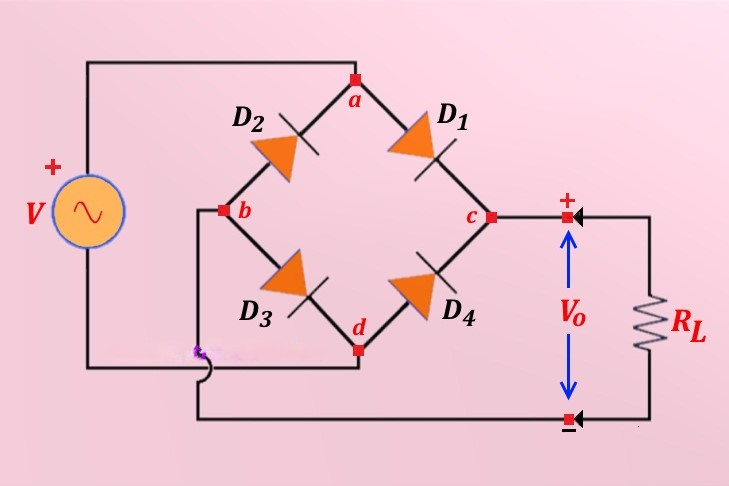

Para simular un rectificador de onda completa se reemplazará este circuito por una entada de tensión senoidal rectificada

##Carga netamente resistiva

- Para este caso, el circuito responde a:

$V_R(s) =R I_{in}(s)$

$\frac{V_R(s)}{V_{in}(s)}=1$

In [ ]:
#paquetes de para simulación
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as sig
import scipy.optimize as opt
#from IPython.display import Image
import sympy as sym
#sym.init_session()

In [ ]:
R_v=float(input("Ingrese el valor de R: "))

Ingrese el valor de R: 1000


In [ ]:
num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([0,1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia en
print(num)
print(den)

[1]
[0 1]


Funcion de transferencia

In [ ]:
Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
Ts = 1/Fs #periodo muestreo
t = np.arange(0, 5*To,Ts) # se simulan 5 peridos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_o = A*(np.sin(2*np.pi*Fo*t))
rec_c = sig.square(2 * np.pi * Fo * t)  # Tren de pulsos para la señal rectificada completa
in_ = in_o * rec_c  # Entrada rectificada completa
#in_ = np.abs(in_o) #señal rectificada
out = G_n.output(in_, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

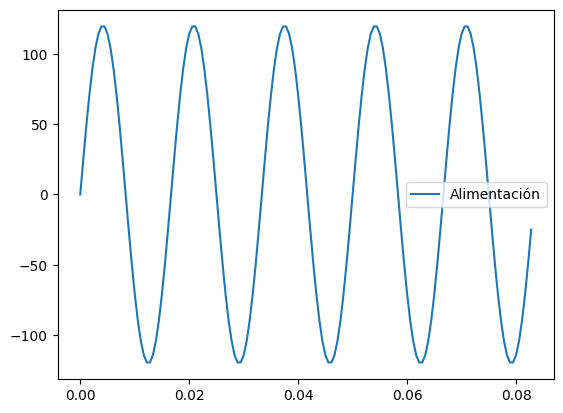

In [ ]:
#señales de alimentación
plt.plot(t,in_o,label='Alimentación')
plt.legend()
plt.show()

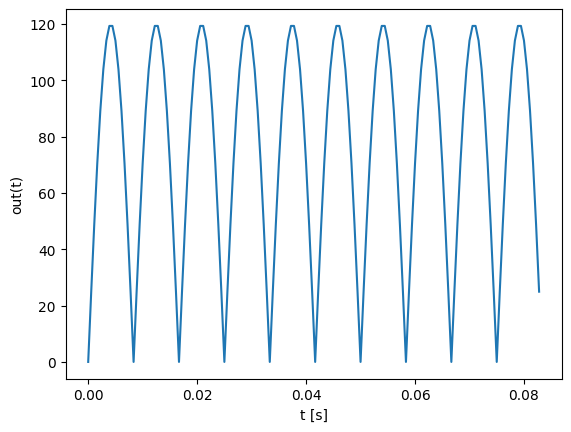

In [ ]:
plt.plot(t, in_,label='In(t)')#entrada rectificada
#plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

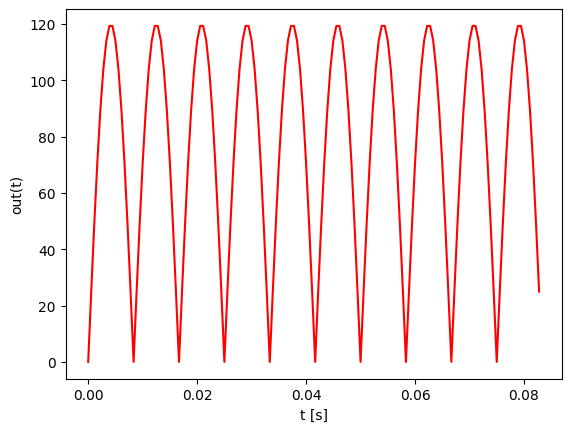

In [ ]:
#plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, out,c="r",label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

Debido a que la resistencia es una carga no almacenadora de energía, el voltaje de entrada es igual al voltaje de salida

##Calculo del espectro

<ipython-input-59-ffa2343f6a8d>:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(vfre, abs(Xf) / len(out), use_line_collection=True)


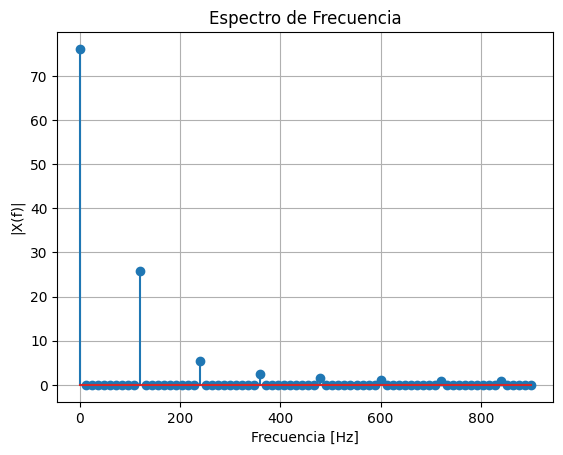

In [ ]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

# Visualizar el espectro de frecuencias
plt.stem(vfre, abs(Xf) / len(out), use_line_collection=True)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|X(f)|')
plt.title('Espectro de Frecuencia')
plt.grid()
plt.show()

##Calcular THD y factor de potencia

In [ ]:
# Cálculo del THD
def calcular_thd(signal, Fs):
    Xf = np.fft.rfft(signal)  # FFT de la señal
    magnitudes = np.abs(Xf)
    freqs = np.fft.rfftfreq(len(signal), 1 / Fs)

    # Identificar la frecuencia fundamental
    fundamental_idx = np.argmax(magnitudes)
    fundamental = magnitudes[fundamental_idx]

    # Cálculo del THD como la suma de los armónicos sobre la fundamental
    thd = np.sqrt(np.sum(magnitudes[1:]**2)) / fundamental
    return thd

In [ ]:
# Cálculo del THD para el circuito R
thd_r = calcular_thd(out, Fs)
print(f"THD del circuito con carga resistiva: {thd_r * 100:.2f}%")

THD del circuito con carga resistiva: 34.84%


In [ ]:
pf=np.sqrt(1/(1+(thd_r)**2))
print(f"El factor de potencia de la señal con carga resistiva: {pf:.4f}")

El factor de potencia de la señal con carga resistiva: 0.9443


##Carga RC

- En este caso, el circuito responde a:

$ \frac{V_o(s)}{V_i(s)} =\frac{1}{RCs+1}$



In [ ]:
R_v=float(input("Ingrese el valor de R: "))
C_v=float(input("Ingrese el valor de C: "))

# Función de transferencia del circuito RC
num = np.array([1])
den = np.array([R_v * C_v, 1])
G_n = sig.TransferFunction(num, den)
out = G_n.output(in_, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

Ingrese el valor de R: 1000
Ingrese el valor de C: 10e-6


Gráfica

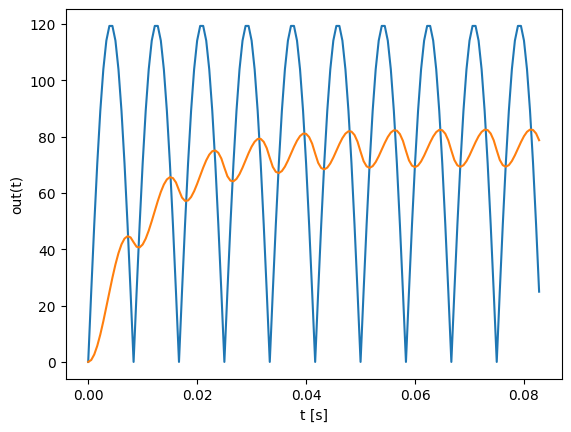

In [ ]:
plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

##Cálculo del espectro

<ipython-input-66-ffa2343f6a8d>:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(vfre, abs(Xf) / len(out), use_line_collection=True)


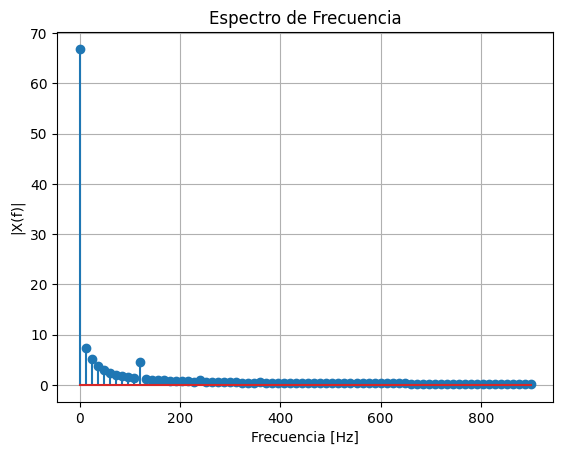

In [ ]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

# Visualizar el espectro de frecuencias
plt.stem(vfre, abs(Xf) / len(out), use_line_collection=True)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|X(f)|')
plt.title('Espectro de Frecuencia')
plt.grid()
plt.show()

##Cálculo del THD

In [ ]:
# Cálculo del THD
def calcular_thd(signal, Fs):
    Xf = np.fft.rfft(signal)  # FFT de la señal
    magnitudes = np.abs(Xf)
    freqs = np.fft.rfftfreq(len(signal), 1 / Fs)

    # Identificar la frecuencia fundamental
    fundamental_idx = np.argmax(magnitudes)
    fundamental = magnitudes[fundamental_idx]

    # Cálculo del THD como la suma de los armónicos sobre la fundamental
    thd = np.sqrt(np.sum(magnitudes[1:]**2)) / fundamental
    return thd

In [ ]:
# Cálculo del THD para el circuito RC (con filtro)
thd_rc = calcular_thd(out, Fs)
print(f"THD del circuito RC: {thd_rc * 100:.2f}%")

THD del circuito RC: 18.68%


In [ ]:
pf=np.sqrt(1/(1+(thd_rc)**2))
print(f"El factor de potencia de la señal con carga RC: {pf:.4f}")

El factor de potencia de la señal con carga RC: 0.9830
